# CURACION DE DE RESEÑAS. 
## ESTRUCTURA Y UNIFICACIÓN EN BASE DE DATOS CSV

In [ ]:
"""
import os
import pandas as pd

# Ruta de la carpeta que contiene los archivos CSV
carpeta = "data_reviews"
carpeta_corregidos = "data_reviews/corregidos"

# Obtener la lista de archivos CSV en la carpeta
archivos = [f for f in os.listdir(carpeta) if f.endswith(".csv")]

# Procesar cada archivo
for archivo in archivos:
    ruta_archivo = os.path.join(carpeta, archivo)

    # Obtener el nombre del hotel sin la extensión .csv
    nombre_hotel = os.path.splitext(archivo)[0]

    # Cargar el archivo CSV asegurando que las comillas dobles sean interpretadas correctamente
    df = pd.read_csv(ruta_archivo, quotechar='"', delimiter=",")

    # Reemplazar comas por punto y coma en el campo "Review_Text"
    if "Review Text" in df.columns:
        df["Review Text"] = df["Review Text"].str.replace(",", ";")

    # Agregar la nueva columna al inicio con el nombre del hotel
    df.insert(0, "Hotel_Name", nombre_hotel)

    # Guardar el archivo corregido en la misma carpeta con un nuevo nombre
    ruta_guardado = os.path.join(carpeta_corregidos, f"corregido_{archivo}")
    df.to_csv(ruta_guardado, index=False, quotechar='"')

    print(f"Procesado: {archivo} → Guardado como: corregido_{archivo}")

print("Todos los archivos han sido procesados correctamente.")

"""




In [ ]:
"""
# Unir todos los archivos corregidos en uno solo para preprocesar

# Define la ruta de la carpeta donde están los archivos CSV
carpeta_corr = "data_reviews/corregidos" #"ruta/a/la/carpeta"

# Obtiene la lista de todos los archivos CSV en la carpeta
archivos_csv = [f for f in os.listdir(carpeta_corr) if f.endswith('.csv')]

# Crea una lista para almacenar los DataFrames
dataframes = []

# Itera sobre cada archivo, cárgalo y agrégalo a la lista
for archivo in archivos_csv:
    ruta_completa = os.path.join(carpeta_corr, archivo)
    df = pd.read_csv(ruta_completa)
    dataframes.append(df)

# Une todos los DataFrames en uno solo
df_concatenado = pd.concat(dataframes, ignore_index=True)

# Guarda el resultado en un nuevo archivo CSV
df_concatenado.to_csv("bogota_hotel_reviews.csv", index=False)

print("Unión completada. El archivo resultante se ha guardado como 'bogota_hotel_reviews.csv'.")
"""

In [1]:
# Carga de data 
import os
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv("bogota_hotel_reviews.csv", quotechar='"', delimiter=",")

print(f"Total de registros en la base: {df.shape[0]}")

Total de registros en la base: 47489


In [3]:
#Detección de registros duplicados en la base de datos consolidada
# Buscar registros duplicados en "Review Id"
duplicados = df[df.duplicated(subset=["Review Id"], keep=False)]

print(f"Total de registros duplicados: {df.duplicated(subset=['Review Id']).sum()}")

Total de registros duplicados: 1846


In [5]:
# Seleccionar solo las columnas requeridas y mostrar los primeros 10 registros duplicados
columnas_interes = ["Hotel_Name", "Review Id", "Review Title", "Review Text"]
print(duplicados.loc[:, columnas_interes].head(10))

     Hotel_Name  Review Id                                       Review Title   
1121  93 luxury  863553796                               Wonderful experience  \
1122  93 luxury  863152586                                   Viaje en Familia   
1123  93 luxury  862619053    The Hotel in Bogota with the service experience   
1124  93 luxury  861551749  Excelente Aparthotel cerca del Parque 93 en Bo...   
1125  93 luxury  860886543          What an amazing place and team of people!   
1126  93 luxury  860634796                                          Grandioso   
1127  93 luxury  860634542                                  Muy buen servicio   
1128  93 luxury  860440986                                      1 month stay    
1129  93 luxury  859152375                                 Coctel del Gerente   
1130  93 luxury  858279660          Excelente sitio para compartir en familia   

                                            Review Text  
1121  We really enjoyed our short stay here. The s

In [7]:
# Identificar la cantidad de "Review Id" duplicados agrupando por el campo "Hotel Name"

# Contar cuántas veces aparece cada "Review Id"
conteo_ids = df["Review Id"].value_counts()

# Filtrar solo los "Review Id" que aparecen más de una vez (duplicados reales)
ids_duplicados = conteo_ids[conteo_ids > 1].index

# Filtrar el DataFrame para obtener solo los registros con "Review Id" duplicados
duplicados_reales = df[df["Review Id"].isin(ids_duplicados)]

# Contar la cantidad de "Review Id" duplicados por "Hotel_Name"
conteo_por_hotel = duplicados_reales.groupby("Hotel_Name")["Review Id"].nunique().reset_index()

# Renombrar la columna para mayor claridad
conteo_por_hotel.columns = ["Hotel_Name", "Cantidad_Review_Id_Duplicados"]

# Mostrar los resultados
print(conteo_por_hotel)

                                 Hotel_Name  Cantidad_Review_Id_Duplicados
0                                 93 luxury                             10
1               Casa Dann Carlton Hotel Spa                             20
2                               Click Clack                             40
3      Courtyard By Marriott Bogota Airport                             10
4   Double Tree By Hilton Bogota Salitre AR                            100
5                         GHL Hotel Capital                            340
6                      GHL Hotel Tequendama                             30
7                        Grand Hyatt Bogota                            160
8          Hilton Garden Inn Bogota Airport                             10
9                           Hotel B3 Virrey                             50
10                Hotel Dann Carlton Bogota                             30
11                 Hotel Estelar La Fontana                             60
12            Hotel Estel

In [9]:
# Eliminar duplicados manteniendo solamente la reseña inicial
df_sin_duplicados = df.drop_duplicates(subset=["Review Id"], keep="first")

In [11]:
# Se verifica nuevamente la presencia de duplicados

# Buscar registros duplicados en "Review Id"
duplicados_df_sin = df_sin_duplicados[df_sin_duplicados.duplicated(subset=["Review Id"], keep=False)]

print(f"Total de registros duplicados: {df_sin_duplicados.duplicated(subset=['Review Id']).sum()}")

Total de registros duplicados: 0


In [13]:
print(f"Cantidad de registros en df_sin_duplicados: {df_sin_duplicados.shape[0]}")

Cantidad de registros en df_sin_duplicados: 45643


In [15]:
# Lista de columnas que queremos conservar
columnas_interes = [
    "Hotel_Name", "Review Id", "User Location", "User Is Verified", 
    "Rating", "Review Title", "Review Text", 
    "Published Date", "Language"
]

# Crear un nuevo DataFrame solo con esas columnas
df_preprocesamiento = df_sin_duplicados[columnas_interes]

# Mostrar las primeras filas para verificar
print(df_preprocesamiento.head())

  Hotel_Name  Review Id User Location User Is Verified  Rating   
0  100 luxry  979285756           NaN               No       4  \
1  100 luxry  979242709           NaN               No       5   
2  100 luxry  978660661           NaN               No       5   
3  100 luxry  978071990        Bogota               No       5   
4  100 luxry  976892350           NaN               No       5   

                                        Review Title   
0  Un gran lugar para compartir una noche especta...  \
1                                  Vale cada centavo   
2                               Excellent experience   
3                      Diamond Relax Plan, a delight   
4                                        Couple plan   

                                         Review Text Published Date Language  
0  Un lugar muy confortable; espacioso; limpio. U...     2024-11-09       es  
1  Ficamos aqui por que nosso voo da Avianca foi ...     2024-11-09       pt  
2  I loved the design of the 

In [17]:
# convertir texto a minúsculas
import re

# Función para convertir texto a minúsculas [y eliminar caracteres especiales]
def texto_a_minusculas(texto):
    # Asegurarse de que el valor sea una cadena de texto
    if isinstance(texto, str):
        # Convertir a minúsculas
        texto = texto.lower()
        # Eliminar caracteres especiales, manteniendo solo letras y números
        # texto = re.sub(r'[^a-z0-9\s]', '', texto)
    return texto

# Aplicar la función de limpieza a las columnas de texto
df_preprocesamiento["Hotel_Name"] = df_preprocesamiento["Hotel_Name"].apply(texto_a_minusculas)
df_preprocesamiento["Review Title"] = df_preprocesamiento["Review Title"].apply(texto_a_minusculas)
df_preprocesamiento["Review Text"] = df_preprocesamiento["Review Text"].apply(texto_a_minusculas)
df_preprocesamiento["Language"] = df_preprocesamiento["Language"].apply(texto_a_minusculas)

# Verificar los resultados
print(df_preprocesamiento.head())


C:\Users\Usuario\AppData\Local\Temp\ipykernel_3132\4029784338.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_preprocesamiento["Hotel_Name"] = df_preprocesamiento["Hotel_Name"].apply(texto_a_minusculas)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_3132\4029784338.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_preprocesamiento["Review Title"] = df_preprocesamiento["Review Title"].apply(texto_a_minusculas)


  Hotel_Name  Review Id User Location User Is Verified  Rating   
0  100 luxry  979285756           NaN               No       4  \
1  100 luxry  979242709           NaN               No       5   
2  100 luxry  978660661           NaN               No       5   
3  100 luxry  978071990        Bogota               No       5   
4  100 luxry  976892350           NaN               No       5   

                                        Review Title   
0  un gran lugar para compartir una noche especta...  \
1                                  vale cada centavo   
2                               excellent experience   
3                      diamond relax plan, a delight   
4                                        couple plan   

                                         Review Text Published Date Language  
0  un lugar muy confortable; espacioso; limpio. u...     2024-11-09       es  
1  ficamos aqui por que nosso voo da avianca foi ...     2024-11-09       pt  
2  i loved the design of the 

C:\Users\Usuario\AppData\Local\Temp\ipykernel_3132\4029784338.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_preprocesamiento["Review Text"] = df_preprocesamiento["Review Text"].apply(texto_a_minusculas)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_3132\4029784338.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_preprocesamiento["Language"] = df_preprocesamiento["Language"].apply(texto_a_minusculas)


# TRADUCCIÓN. 
## UNIFICAR RESEÑAS EN UN SOLO IDIOMA (INGLÉS).

In [19]:
# Análisis de Idiomas (Language)
# Detallar los idiomas en que están escritas las reseñas y contar la cantidad de reseñas por idioma

idiomas = df_preprocesamiento["Language"].value_counts()
idiomas

Language
es      26317
en      14739
pt       3235
fr        483
it        335
de        315
nl         85
ru         34
ja         25
zhcn       15
sv         15
zhtw        7
da          6
tr          6
iw          5
pl          5
ko          4
no          3
fi          2
cs          2
in          1
ar          1
sr          1
hu          1
el          1
Name: count, dtype: int64

In [21]:
# se traducen al inglés solamente los títulos y las reseñas en español. Se mantienen los titulos y reseñas en inglés

# Lista de idiomas permitidos
idiomas_permitidos = ["es", "en"]

# Filtrar el dataframe para conservar solo los registros con los idiomas permitidos
df_idiomas_permitidos = df_preprocesamiento[df_preprocesamiento["Language"].isin(idiomas_permitidos)]
print(f"Cantidad de registros en df_idiomas_permitidos: {df_idiomas_permitidos.shape[0]}")

Cantidad de registros en df_idiomas_permitidos: 41056


In [23]:
# Volver a contar la cantidad de reseñas por idioma para validar que solo hayan reseñas de idiomas permitidos

idiomas_filtrados = df_idiomas_permitidos["Language"].value_counts()
idiomas_filtrados

Language
es    26317
en    14739
Name: count, dtype: int64

In [ ]:
# Traducción al inglés de las reseñas de los idiomas permitidos "es", "en", "pt", "fr", "it", "de"
# Instalar las librerías necesarias
# !pip install googletrans==4.0.0-rc1


In [29]:
# extraer las reseñas en español (Language == "es") del DataFrame df_idiomas_permitidos, 
# dividirlas en 10 partes y guardarlas en archivos CSV numerados del 1 al 10
'''
import pandas as pd
import numpy as np

# Filtrar solo las reseñas en español
df_es = df_idiomas_permitidos[df_idiomas_permitidos["Language"] == "es"].copy()

# Determinar el tamaño de cada subconjunto
num_parts = 10
split_dfs = np.array_split(df_es, num_parts)  # Divide el DataFrame en 10 partes

# Guardar cada parte en un archivo CSV separado
for i, df_part in enumerate(split_dfs, start=1):
    df_part.to_csv(f"reviews_es_part_{i}.csv", index=False, encoding="utf-8")

print("Archivos CSV generados exitosamente.")
'''

Archivos CSV generados exitosamente.


In [25]:
!pip show googletrans

Name: googletrans
Version: 4.0.0rc1
Summary: Free Google Translate API for Python. Translates totally free of charge.
Home-page: https://github.com/ssut/py-googletrans
Author: SuHun Han
Author-email: ssut@ssut.me
License: MIT
Location: C:\Users\Usuario\anaconda3\Lib\site-packages
Requires: httpx
Required-by: 


In [ ]:
# import sys
# print(sys.version)
#!pip install blis

In [31]:
# TRADUCIR RESEÑAS A INGLÉS
# import pandas as pd
from googletrans import Translator
import time
import os

In [37]:
# Crear la carpeta para los archivos traducidos si no existe
output_folder = "translated_reviews"
os.makedirs(output_folder, exist_ok=True)

# Inicializar el traductor de Google
translator_google = Translator()

# Función para traducir texto con Google Translate (es → en)
def translate_google(text):
    if pd.isna(text) or text.strip() == "":
        return text  # Si el texto está vacío o es NaN, lo dejamos igual
    try:
        translated = translator_google.translate(text, src="es", dest="en").text
        time.sleep(1)  # Reducir velocidad de solicitudes
        return translated
    except Exception as e:
        print(f"Error con Google Translate: {e}")
        return text  # En caso de error, devolver el texto original

# Número de registros a procesar antes de guardar
batch_size = 500

# Procesar los 10 archivos generados previamente
for i in range(1, 11):
    file_name = f"reviews_es_part_{i}.csv"
    
    # Cargar el archivo CSV
    df = pd.read_csv(file_name, encoding="utf-8")

    # Inicializar columnas de traducción
    df["Translated_Title_Review"] = ""
    df["Translated_Text_Review"] = ""

    # Procesar en lotes de batch_size
    for start in range(0, len(df), batch_size):
        end = start + batch_size
        batch = df.iloc[start:end].copy()

        # Aplicar traducción
        batch["Translated_Title_Review"] = batch["Review Title"].apply(translate_google)
        batch["Translated_Text_Review"] = batch["Review Text"].apply(translate_google)

        # Guardar progresivamente el archivo traducido
        output_file = os.path.join(output_folder, f"translated_reviews_{i}.csv")

        # Guardar en CSV (si es el primer batch, sobrescribir, si no, añadir)
        batch.to_csv(output_file, mode="a", index=False, encoding="utf-8", header=(start == 0))

        print(f"Lote {start} - {end} guardado en {output_file}")

print("Proceso de traducción completado.")


Lote 0 - 500 guardado en translated_reviews\translated_reviews_1.csv
Lote 500 - 1000 guardado en translated_reviews\translated_reviews_1.csv
Error con Google Translate: the JSON object must be str, bytes or bytearray, not NoneType
Error con Google Translate: the JSON object must be str, bytes or bytearray, not NoneType
Error con Google Translate: the JSON object must be str, bytes or bytearray, not NoneType
Error con Google Translate: the JSON object must be str, bytes or bytearray, not NoneType
Lote 1000 - 1500 guardado en translated_reviews\translated_reviews_1.csv
Lote 1500 - 2000 guardado en translated_reviews\translated_reviews_1.csv
Lote 2000 - 2500 guardado en translated_reviews\translated_reviews_1.csv
Lote 2500 - 3000 guardado en translated_reviews\translated_reviews_1.csv
Lote 0 - 500 guardado en translated_reviews\translated_reviews_2.csv
Lote 500 - 1000 guardado en translated_reviews\translated_reviews_2.csv
Lote 1000 - 1500 guardado en translated_reviews\translated_reviews

In [25]:
#Unir las reseñas traducidas de español a inglés con las reseñas en inglés en un nuevo dataframe

import pandas as pd
import os

# Crear un dataframe vacío para almacenar las traducciones
df_translated = pd.DataFrame()

# Ruta donde están almacenados los archivos traducidos
translated_folder = "translated_reviews"

# Cargar los 10 archivos en df_translated
for i in range(1, 11):
    file_path = os.path.join(translated_folder, f"translated_reviews_{i}.csv")
    temp_df = pd.read_csv(file_path)
    
    # Eliminar columnas originales
    temp_df.drop(columns=["Review Title", "Review Text"], inplace=True)
    
    # Renombrar columnas traducidas
    temp_df.rename(columns={
        "Translated_Title_Review": "Review Title",
        "Translated_Text_Review": "Review Text"
    }, inplace=True)
    
    # Concatenar al dataframe final
    df_translated = pd.concat([df_translated, temp_df], ignore_index=True)

# Extraer reseñas en inglés desde df_idiomas_permitidos
df_en_reviews = df_idiomas_permitidos[df_idiomas_permitidos["Language"] == "en"].copy()

# Combinar ambos dataframes en uno solo
df_final_reviews = pd.concat([df_translated, df_en_reviews], ignore_index=True)

# Mostrar información del dataframe final
print(df_final_reviews.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41056 entries, 0 to 41055
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Hotel_Name        41056 non-null  object
 1   Review Id         41056 non-null  int64 
 2   User Location     23151 non-null  object
 3   User Is Verified  41056 non-null  object
 4   Rating            41056 non-null  int64 
 5   Published Date    41056 non-null  object
 6   Language          41056 non-null  object
 7   Review Title      41047 non-null  object
 8   Review Text       41056 non-null  object
dtypes: int64(2), object(7)
memory usage: 2.8+ MB
None


In [27]:
print(df_final_reviews.head())

  Hotel_Name  Review Id User Location User Is Verified  Rating Published Date   
0  100 luxry  979285756           NaN               No       4     2024-11-09  \
1  100 luxry  906758315           NaN               No       5     2023-07-30   
2  100 luxry  906479966           NaN               No       5     2023-07-29   
3  100 luxry  895423330           NaN               No       3     2023-06-16   
4  100 luxry  890106560  Barranquilla               No       5     2023-05-12   

  Language                                       Review Title   
0       es  A great place to share a spectacular night wit...  \
1       es       Incredible Spanish dinner, super recommended   
2       es                                  Excellent service   
3       es                        Good Hotel for Short Travel   
4       es                                 Super recommended.   

                                         Review Text  
0  a very comfortable place;spacious;clean.Excell...  
1  The room 

In [1]:
################ REINICIAR AQUI ###################
import os
import pandas as pd

# Cargar el archivo CSV
df_final_reviews = pd.read_csv("final_reviews.csv", quotechar='"', delimiter=",")

print(f"Total de registros en la base: {df_final_reviews.shape[0]}")

Total de registros en la base: 41056


In [2]:
print(df_final_reviews.head())

  Hotel_Name  Review Id User Location User Is Verified  Rating Published Date  \
0  100 luxry  979285756           NaN               No       4     2024-11-09   
1  100 luxry  906758315           NaN               No       5     2023-07-30   
2  100 luxry  906479966           NaN               No       5     2023-07-29   
3  100 luxry  895423330           NaN               No       3     2023-06-16   
4  100 luxry  890106560  Barranquilla               No       5     2023-05-12   

  Language                                       Review Title  \
0       es  A great place to share a spectacular night wit...   
1       es       Incredible Spanish dinner, super recommended   
2       es                                  Excellent service   
3       es                        Good Hotel for Short Travel   
4       es                                 Super recommended.   

                                         Review Text  
0  a very comfortable place;spacious;clean.Excell...  
1  The room 

In [3]:
# convertir texto a minúsculas
import re

# Función para convertir texto a minúsculas [y eliminar caracteres especiales]
def texto_a_minusculas(texto):
    # Asegurarse de que el valor sea una cadena de texto
    if isinstance(texto, str):
        # Convertir a minúsculas
        texto = texto.lower()
        # Eliminar caracteres especiales, manteniendo solo letras y números
        # texto = re.sub(r'[^a-z0-9\s]', '', texto)
    return texto

# Aplicar la función de texto_a_minusculas a las columnas de texto
df_final_reviews["Hotel_Name"] = df_final_reviews["Hotel_Name"].apply(texto_a_minusculas)
df_final_reviews["Review Title"] = df_final_reviews["Review Title"].apply(texto_a_minusculas)
df_final_reviews["Review Text"] = df_final_reviews["Review Text"].apply(texto_a_minusculas)
df_final_reviews["Language"] = df_final_reviews["Language"].apply(texto_a_minusculas)

# Verificar los resultados
print(df_final_reviews.head())

  Hotel_Name  Review Id User Location User Is Verified  Rating Published Date  \
0  100 luxry  979285756           NaN               No       4     2024-11-09   
1  100 luxry  906758315           NaN               No       5     2023-07-30   
2  100 luxry  906479966           NaN               No       5     2023-07-29   
3  100 luxry  895423330           NaN               No       3     2023-06-16   
4  100 luxry  890106560  Barranquilla               No       5     2023-05-12   

  Language                                       Review Title  \
0       es  a great place to share a spectacular night wit...   
1       es       incredible spanish dinner, super recommended   
2       es                                  excellent service   
3       es                        good hotel for short travel   
4       es                                 super recommended.   

                                         Review Text  
0  a very comfortable place;spacious;clean.excell...  
1  the room 

# ANALISIS DESCRIPTIVO

In [4]:
# Verificar información general del DataFrame
print(df_final_reviews.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41056 entries, 0 to 41055
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Hotel_Name        41056 non-null  object
 1   Review Id         41056 non-null  int64 
 2   User Location     23151 non-null  object
 3   User Is Verified  41056 non-null  object
 4   Rating            41056 non-null  int64 
 5   Published Date    41056 non-null  object
 6   Language          41056 non-null  object
 7   Review Title      41047 non-null  object
 8   Review Text       41056 non-null  object
dtypes: int64(2), object(7)
memory usage: 2.8+ MB
None


In [5]:
# Revisar valores nulos
print(df_final_reviews.isnull().sum())

Hotel_Name              0
Review Id               0
User Location       17905
User Is Verified        0
Rating                  0
Published Date          0
Language                0
Review Title            9
Review Text             0
dtype: int64


In [6]:
# Descripción General del Dataset

# Resumen estadístico de los datos numéricos
print(df_final_reviews['Rating'].describe())

count    41056.000000
mean         4.431118
std          0.948346
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64


In [7]:
# Resumen de los datos categóricos (columnas de texto)
print(df_final_reviews.describe(include=['O'])) 

               Hotel_Name User Location User Is Verified Published Date  \
count               41056         23151            41056          41056   
unique                 49          2951                2           5051   
top     ghl hotel capital        Bogota               No     2019-09-23   
freq                 2599          3068            41055             42   

       Language Review Title  \
count     41056        41047   
unique        2        24287   
top          es    excellent   
freq      26317         1724   

                                              Review Text  
count                                               41056  
unique                                              41050  
top     i come to bogota maybe twice a year for busine...  
freq                                                    2  


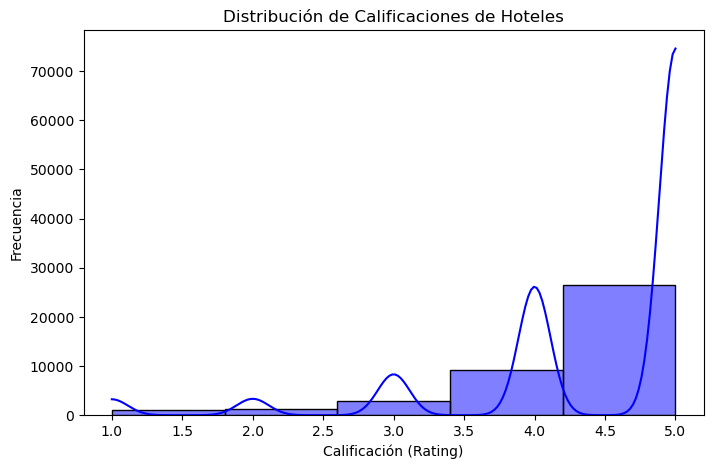

In [8]:
# Análisis de Calificaciones (Rating)
import seaborn as sns
import matplotlib.pyplot as plt
# Distribución de ratings
plt.figure(figsize=(8,5))
sns.histplot(df_final_reviews["Rating"], bins=5, kde=True, color="blue")
plt.xlabel("Calificación (Rating)")
plt.ylabel("Frecuencia")
plt.title("Distribución de Calificaciones de Hoteles")
plt.show()

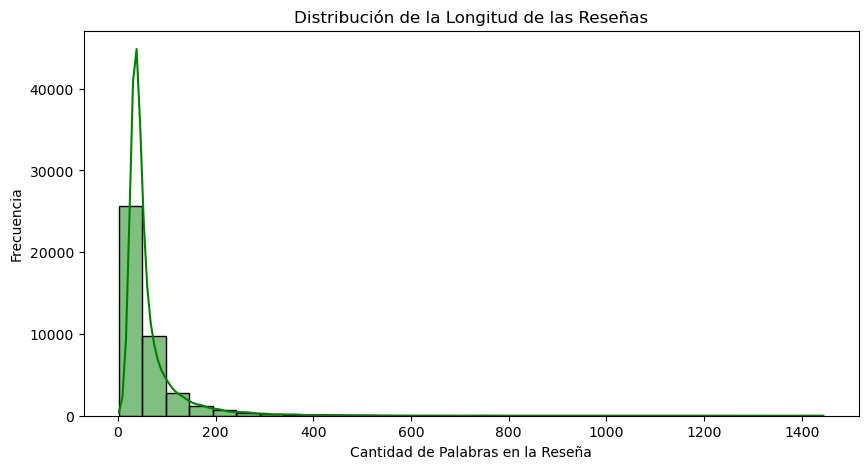

In [9]:
# Análisis de la Longitud de las Reseñas
# Crear una nueva columna con la cantidad de palabras por reseña
df_final_reviews["Review_Length"] = df_final_reviews["Review Text"].astype(str).apply(lambda x: len(x.split()))

# Graficar la distribución de la longitud de las reseñas
plt.figure(figsize=(10,5))
sns.histplot(df_final_reviews["Review_Length"], bins=30, kde=True, color="green")
plt.xlabel("Cantidad de Palabras en la Reseña")
plt.ylabel("Frecuencia")
plt.title("Distribución de la Longitud de las Reseñas")
plt.show()


In [11]:
# Calcular y mostrar la tabla de distribución de cantidad de palabras por reseña

# Conteo de palabras en la columna Review Text
df_final_reviews['Word_Count'] = df_final_reviews['Review Text'].astype(str).apply(lambda x: len(x.split()))

# Definir los rangos de palabras
bins = [0, 50, 100, 150, 200, float('inf')]
labels = ['1-50', '51-100', '101-150', '151-200', '201+']

# Crear columna con la categoría de longitud de reseña
df_final_reviews['Word_Range'] = pd.cut(df_final_reviews['Word_Count'], bins=bins, labels=labels, right=True)

# Contar cuántas reseñas caen en cada rango
conteo_rangos = df_final_reviews['Word_Range'].value_counts().sort_index()

# Calcular porcentaje acumulado (para efecto Pareto)
conteo_df = conteo_rangos.reset_index()
conteo_df.columns = ['Rango de palabras', 'Cantidad de reseñas']
conteo_df['% acumulado'] = conteo_df['Cantidad de reseñas'].cumsum() / conteo_df['Cantidad de reseñas'].sum() * 100

# Mostrar la tabla
print(conteo_df)


  Rango de palabras  Cantidad de reseñas  % acumulado
0              1-50                25633    62.434236
1            51-100                 9887    86.515978
2           101-150                 2795    93.323753
3           151-200                 1225    96.307482
4              201+                 1516   100.000000


In [7]:
# Frecuencia de Palabras Más Usadas
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")

# Definir stopwords en inglés
stop_words = set(stopwords.words("english"))

# Función para contar palabras en una columna específica
def obtener_frecuencia_palabras(columna, n=20):
    todas_las_palabras = " ".join(df_final_reviews[columna].dropna()).lower().split()
    palabras_filtradas = [word for word in todas_las_palabras if word not in stop_words and len(word) > 2]
    return Counter(palabras_filtradas).most_common(n)

# Palabras más frecuentes en los títulos de reseñas
print("Palabras más frecuentes en Review Title:")
print(obtener_frecuencia_palabras("Review Title"))

# Palabras más frecuentes en los textos de reseñas
print("\nPalabras más frecuentes en Review Text:")
print(obtener_frecuencia_palabras("Review Text"))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Palabras más frecuentes en Review Title:
[('excellent', 9238), ('hotel', 7341), ('good', 6452), ('service', 3841), ('great', 2783), ('stay', 2397), ('location', 1779), ('experience', 1751), ('bogota', 1624), ('best', 1385), ('attention', 1341), ('nice', 1153), ('place', 1021), ('comfortable', 886), ('business', 875), ('option', 866), ('bogotá', 790), ('well', 769), ('hotel,', 745), ('staff', 741)]

Palabras más frecuentes en Review Text:
[('hotel', 32087), ('good', 22664), ('service', 13897), ('room', 13598), ('excellent', 12933), ('staff', 11936), ('rooms', 9556), ('breakfast', 9510), ('stay', 8535), ('great', 7631), ('well', 7049), ('would', 6908), ('attention', 6839), ('one', 6590), ('comfortable', 6504), ('location', 6397), ('food', 6354), ('restaurant', 6053), ('friendly', 5500), ('recommend', 5212)]


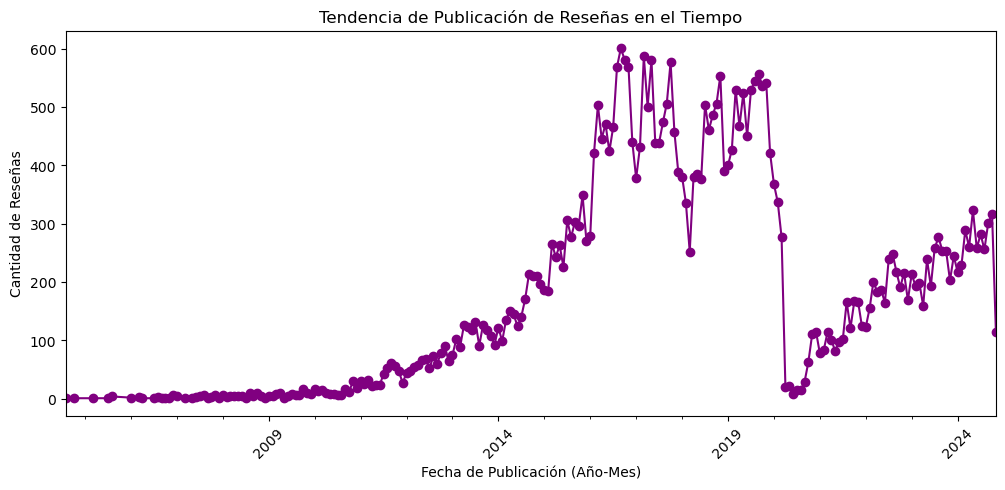